In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# **Dataset loading and exploration**

In [3]:
!kaggle datasets download -d gaurav2022/mobile-health
!unzip mobile-health.zip


df = pd.read_csv('mhealth_raw_data.csv')

Dataset URL: https://www.kaggle.com/datasets/gaurav2022/mobile-health
License(s): CC0-1.0
 73% 26.0M/35.5M [00:00<00:00, 62.5MB/s]
100% 35.5M/35.5M [00:00<00:00, 67.1MB/s]
Archive:  mobile-health.zip
  inflating: mhealth_raw_data.csv    


In [4]:
df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [6]:
df.drop(columns=['subject'], inplace=True)

In [7]:
num_activities = df['Activity'].nunique()
print("Number of unique activities:", num_activities)

Number of unique activities: 13


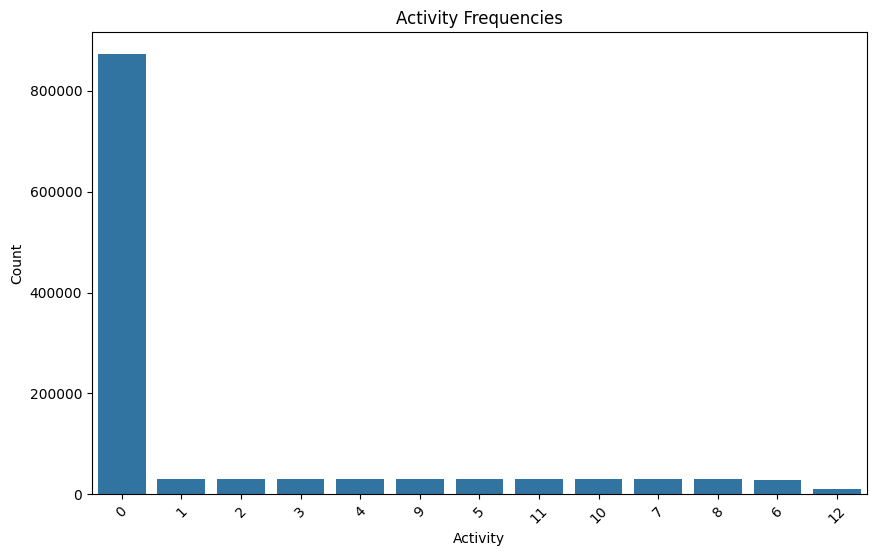

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Activity', data=df, order=df['Activity'].value_counts().index)
plt.title('Activity Frequencies')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [9]:
activity_counts = df['Activity'].value_counts()
print(activity_counts)

Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
5      30720
11     30720
10     30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64


In [10]:
grouped = df.groupby('Activity')
sampled_df = pd.DataFrame()
percentage_to_take = 0.09

for activity, group_df in grouped:
    num_samples = int(len(group_df) * percentage_to_take)
    sampled_class_df = group_df.sample(n=num_samples, random_state=42)
    sampled_df = pd.concat([sampled_df, sampled_class_df], ignore_index=True)

sampled_df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
0,1.33590,-9.7394,-1.66110,0.588130,-0.58724,-0.662080,-3.27030,-9.05310,-0.30682,0.401960,-1.06160,0.14655,0
1,2.52730,-12.7320,-3.88220,0.517630,-0.58537,-0.758350,-4.34630,-10.51300,1.71390,-0.272550,-0.76591,0.85129,0
2,0.55205,-9.7466,1.58070,0.552880,-0.76173,-0.176820,-5.81550,-8.16430,-2.42900,0.137250,-0.99795,0.52155,0
3,2.49960,-9.3680,1.81700,0.736550,-0.55159,0.068762,-3.05040,-5.91350,4.65220,0.084314,-0.71047,0.90086,0
4,-3.48370,-9.2520,0.54423,-0.376620,-0.61163,0.609040,-6.59520,-0.79894,7.10590,-0.900000,1.14580,0.81897,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109403,1.30640,-3.9608,-5.97660,-0.612240,-0.71482,0.381140,-9.33680,-4.30010,0.99333,-0.964710,0.38193,0.34698,12
109404,0.23695,-19.2860,-5.79520,0.727270,-0.29644,-0.728880,-15.67400,-6.81920,5.07570,-0.376470,-1.02870,0.28879,12
109405,-8.03750,-5.9275,-6.61630,0.306120,-0.75047,-0.648330,-21.66900,5.99300,8.29970,-0.700000,0.31828,0.79741,12
109406,8.84270,-3.1746,-3.60160,0.419290,-0.82739,0.225930,-0.25902,-0.30265,2.73490,-0.701960,-0.49692,0.70690,12


In [11]:
activity_counts = sampled_df['Activity'].value_counts()
print(activity_counts)

Activity
0     78529
1      2764
2      2764
3      2764
4      2764
5      2764
11     2764
10     2764
9      2764
7      2649
8      2640
6      2548
12      930
Name: count, dtype: int64


## **Visualization of sample data points**

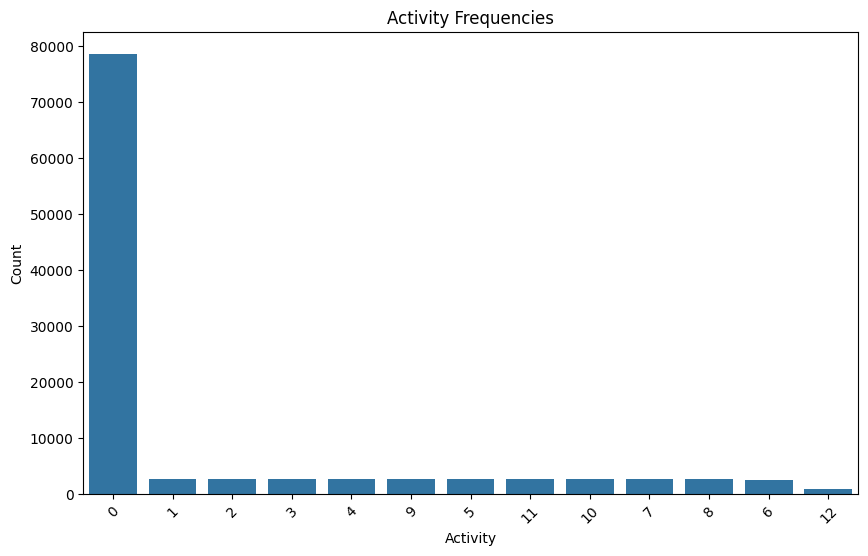

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Activity', data=sampled_df, order=df['Activity'].value_counts().index)
plt.title('Activity Frequencies')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

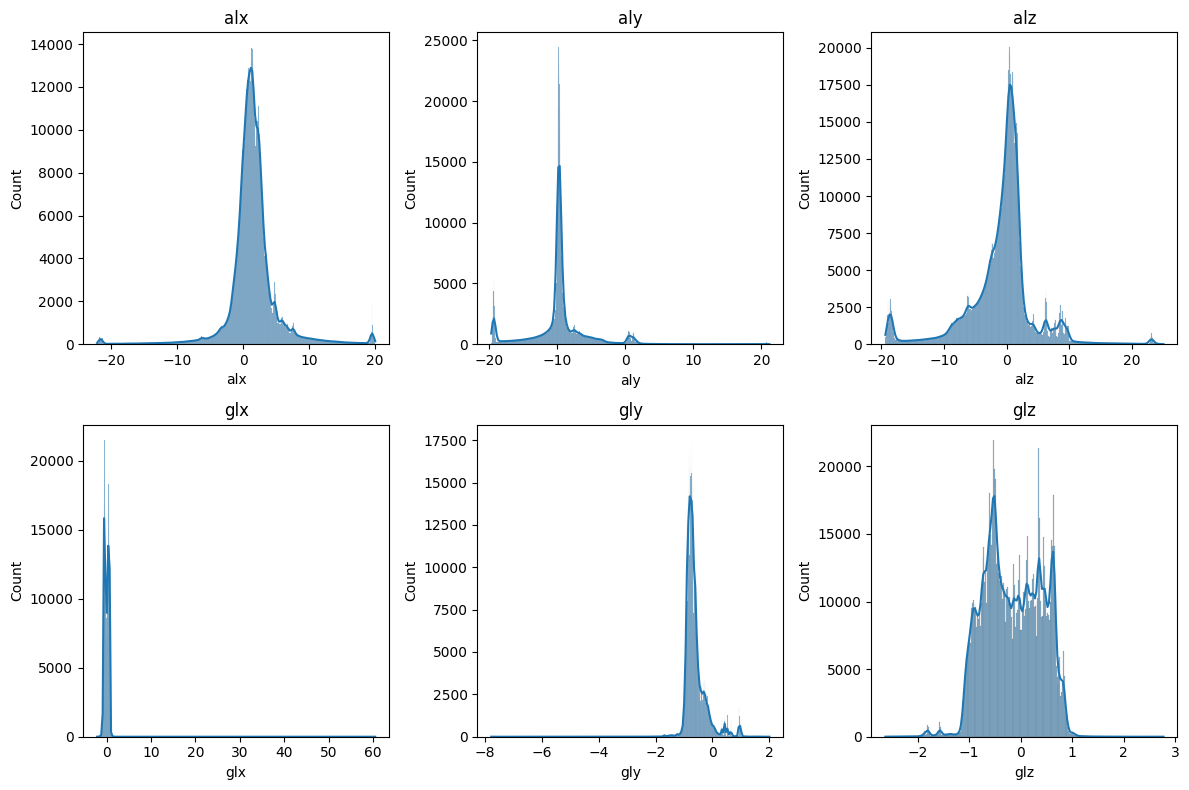

In [13]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['alx', 'aly', 'alz', 'glx', 'gly', 'glz']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

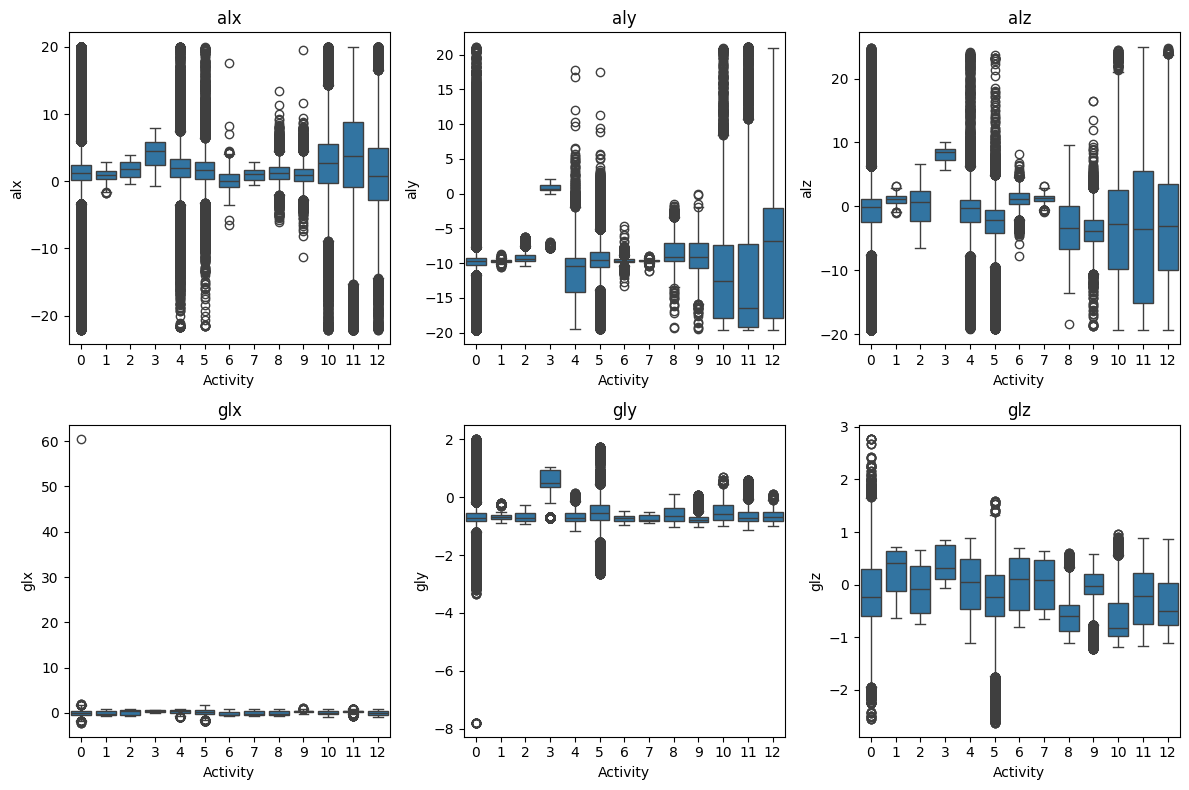

In [14]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['alx', 'aly', 'alz', 'glx', 'gly', 'glz']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Activity', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


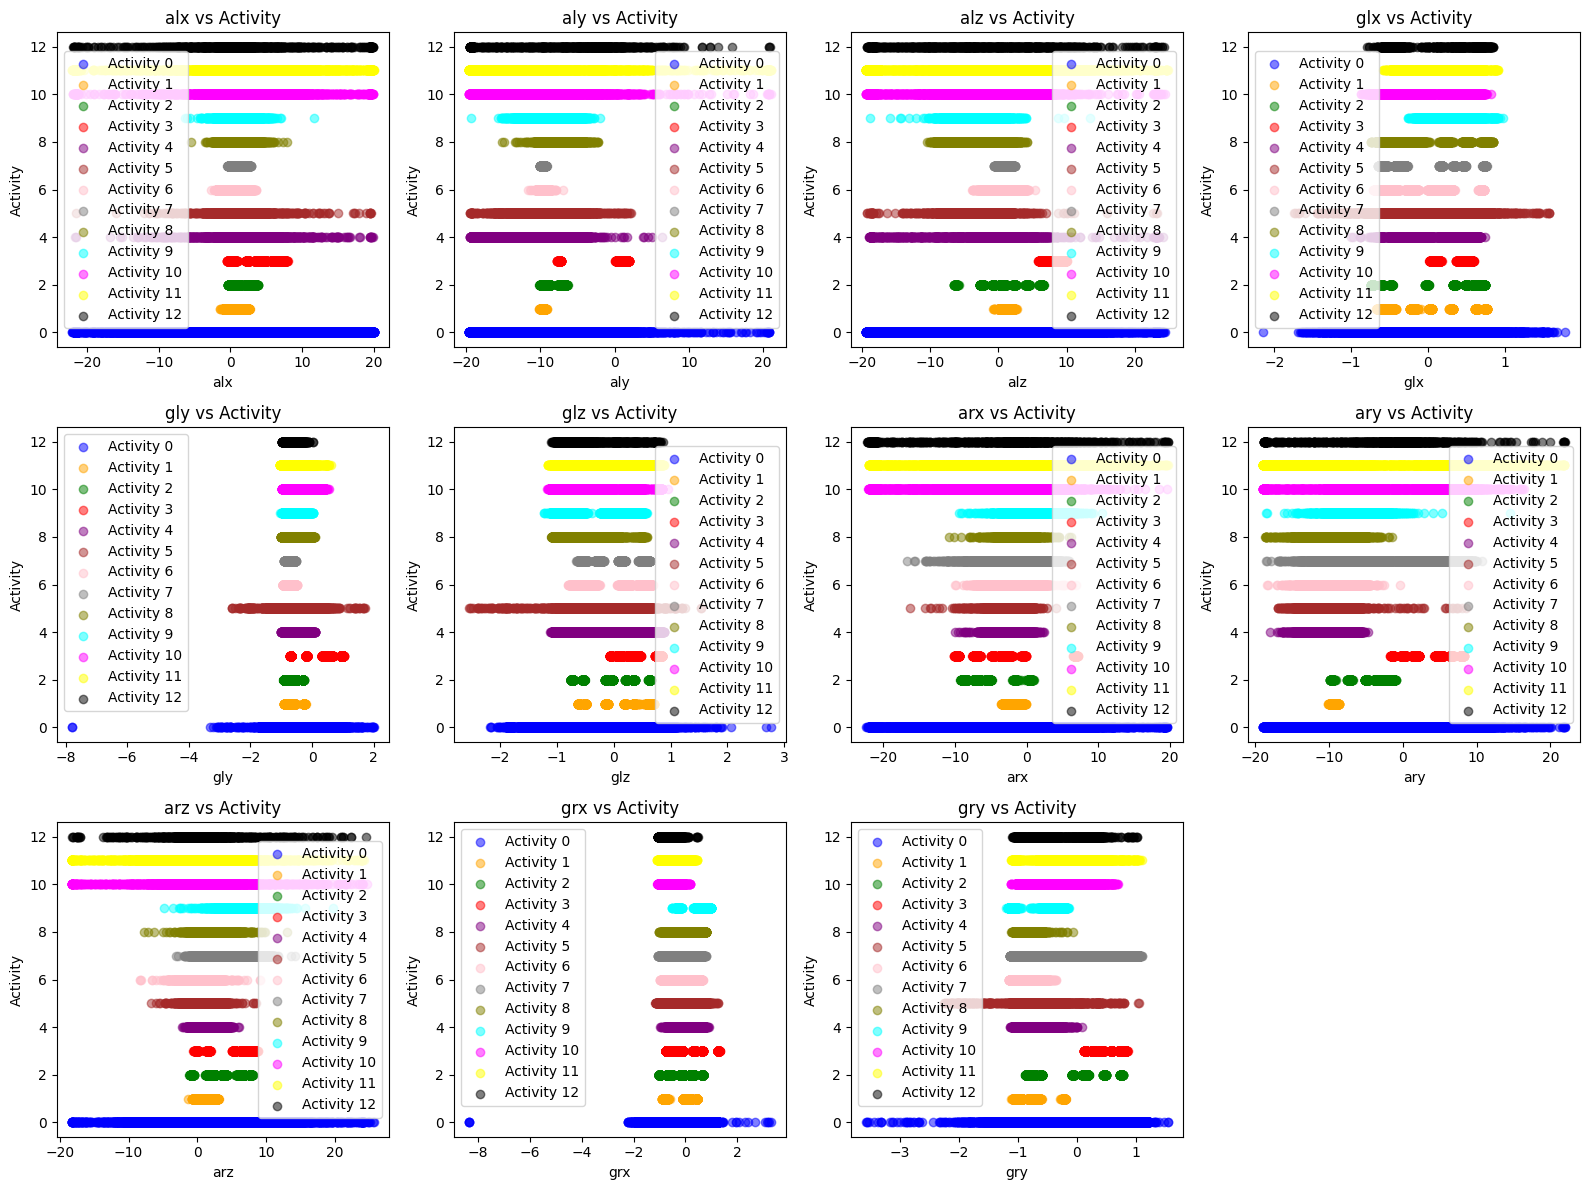

In [15]:
plt.figure(figsize=(16, 12))

activity_colors = {
    0: 'blue', 1: 'orange', 2: 'green', 3: 'red', 4: 'purple',
    5: 'brown', 6: 'pink', 7: 'gray', 8: 'olive', 9: 'cyan',
    10: 'magenta', 11: 'yellow', 12: 'black'
}
for i, feature in enumerate(sampled_df.columns[:-2]):
    plt.subplot(3, 4, i + 1)
    for activity, data in sampled_df.groupby('Activity'):
        plt.scatter(data[feature], data['Activity'], label=f'Activity {activity}', color=activity_colors[activity], alpha=0.5)
    plt.title(f'{feature} vs Activity')
    plt.xlabel(feature)
    plt.ylabel('Activity')
    plt.legend()

plt.tight_layout()
plt.show()

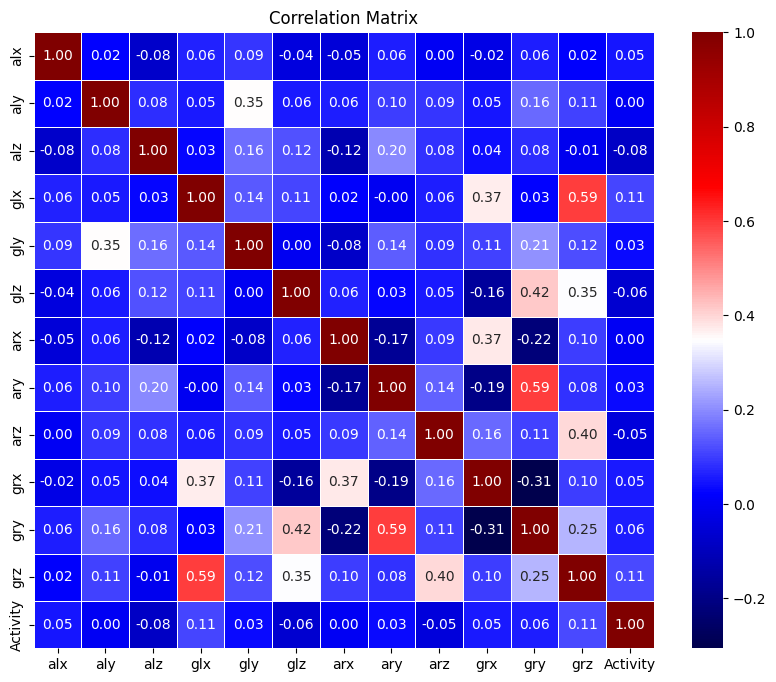

In [16]:
corr_matrix = sampled_df.corr()
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='seismic', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Dividing data for train and test
X = sampled_df.drop(columns=['Activity'])
y = sampled_df['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
evaluation_results = {}

# **KNN**

In [18]:
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [19]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [20]:
# Evaluation
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", knn_accuracy)

knn_precision = precision_score(y_test, y_pred_knn, average='macro')
print("precision:", knn_precision)

knn_recall = recall_score(y_test, y_pred_knn, average='macro')
print("recall:", knn_recall)

knn_f1 = f1_score(y_test, y_pred_knn, average='macro')
print("F1-score:", knn_f1)

knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("confusion matrix: \n", knn_conf_matrix)

Accuracy: 0.8215428205831277
precision: 0.6724814561648494
recall: 0.6353329805788963
F1-score: 0.6398755511876508
confusion matrix: 
 [[14088   180   170   123   176   108   154   187   137   211   135   127
     19]
 [   61   488     0     0     0     0     0     0     0     0     0     0
      0]
 [   43     0   476     0     0     0     0     0     0     0     0     0
      0]
 [   36     0     0   534     0     0     0     0     0     0     0     0
      0]
 [  272     0     0     0   256     2     0     1     6     0     0     0
      0]
 [  316     0     0     0    19   186     2     0     9     0     0     0
      0]
 [  152     3     0     0     0     1   357     4     2     0     0     0
      0]
 [  153     2     0     0     0     0     0   384     0     0     0     0
      0]
 [  208     1     0     0     0     5     6     1   308     0     0     0
      0]
 [  234     0     0     0     0     2     0     0     1   291     0     0
      0]
 [  222     0     0     0     2    

In [21]:
evaluation_results['KNN'] = {
    'accuracy': knn_accuracy,
    'precision': knn_precision,
    'recall': knn_recall,
    'f1_score': knn_f1,
    'confusion_matrix': knn_conf_matrix
}

# **Linear Regression**

> Used 1 vs ALL



In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

binary_labels = []
for class_label in range(num_activities):
    binary_label = (y_train == class_label).astype(int)
    binary_labels.append(binary_label)


linear_regression_models = []
for class_label in range(num_activities):
    model = LinearRegression()
    model.fit(X_train, binary_labels[class_label])
    linear_regression_models.append(model)


probabilities = np.zeros((len(X_test), num_activities))
for class_label in range(num_activities):
    probabilities[:, class_label] = linear_regression_models[class_label].predict(X_test)

predicted_classes = np.argmax(probabilities, axis=1)

mse = mean_squared_error(y_test, predicted_classes)
print("Mean Squared Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("\n")

for class_label in range(num_activities):
    binary_y_test = (y_test == class_label).astype(int)
    binary_y_pred = (predicted_classes == class_label).astype(int)

    accuracy = accuracy_score(binary_y_test, binary_y_pred)

    print(f"Results for class {class_label}:")
    print(f"Accuracy: {accuracy}")
    print()

    model_name = f'Linear Regression (Class {class_label})'
    evaluation_results[model_name] = {
        'accuracy': accuracy
    }

Mean Squared Error (MSE): 13.400923133168815
Root Mean Squared Error (RMSE): 3.660727131755222


Results for class 0:
Accuracy: 0.7265789233159674

Results for class 1:
Accuracy: 0.9749108856594462

Results for class 2:
Accuracy: 0.9762818755141212

Results for class 3:
Accuracy: 0.9777899643542638

Results for class 4:
Accuracy: 0.9754592816013161

Results for class 5:
Accuracy: 0.9756877799104287

Results for class 6:
Accuracy: 0.9762818755141212

Results for class 7:
Accuracy: 0.9753678822776711

Results for class 8:
Accuracy: 0.9758248788958962

Results for class 9:
Accuracy: 0.9758705785577186

Results for class 10:
Accuracy: 0.973996892422996

Results for class 11:
Accuracy: 0.9769216707796362

Results for class 12:
Accuracy: 0.992185357828352



# **Support Vector Machine (SVM)**

In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

In [24]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='macro')
svm_recall = recall_score(y_test, y_pred_svm, average='macro')
svm_f1 = f1_score(y_test, y_pred_svm, average='macro')
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)

print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)
print("Confusion Matrix:\n", svm_conf_matrix)

evaluation_results['SVM'] = {
    'accuracy': svm_accuracy,
    'precision': svm_precision,
    'recall': svm_recall,
    'f1_score': svm_f1,
    'confusion_matrix': svm_conf_matrix
}

Accuracy: 0.7659263321451422
Precision: 0.5023907092513648
Recall: 0.2979762987233958
F1-score: 0.3150504515102232
Confusion Matrix:
 [[15191     0    29   244     0     0     0    48     6    81    87   127
      2]
 [  549     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  467     0    52     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0   570     0     0     0     0     0     0     0     0
      0]
 [  537     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  532     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  519     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  395     0     0     0     0     0     0   144     0     0     0     0
      0]
 [  491     0     0     0     0     0     0     0    38     0     0     0
      0]
 [  364     0     0     0     0     0     0     0     0   164     0     0
      0]
 [  269     0     0     0     0     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Neural Network**

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout #makes summation, activation
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam

In [26]:
std_scaler = StandardScaler()
X_scale = std_scaler.fit_transform(X)

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3, random_state=1)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(76585, 12) (16411, 12) (16412, 12) (76585,) (16411,) (16412,)


In [27]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_activities)
Y_val = to_categorical(Y_val, num_activities)
Y_test = to_categorical(Y_test, num_activities)
print(Y_train.shape, Y_val.shape, Y_test.shape)

(76585, 13) (16411, 13) (16412, 13)


In [32]:
!pip install scikeras

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier

def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_activities, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the Keras model
model = KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=0)


In [35]:
# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the validation set
y_pred_nn = np.argmax(model.predict(X_val), axis=1)

# Calculate evaluation metrics
nn_accuracy = accuracy_score(Y_val.argmax(axis=1), y_pred_nn)
nn_precision = precision_score(Y_val.argmax(axis=1), y_pred_nn, average='macro')
nn_recall = recall_score(Y_val.argmax(axis=1), y_pred_nn, average='macro')
nn_f1 = f1_score(Y_val.argmax(axis=1), y_pred_nn, average='macro')
nn_conf_matrix = confusion_matrix(Y_val.argmax(axis=1), y_pred_nn)

print("Accuracy:", nn_accuracy)
print("Precision:", nn_precision)
print("Recall:", nn_recall)
print("F1-score:", nn_f1)
print("Confusion Matrix:\n", nn_conf_matrix)

# Store results in a dictionary
evaluation_results = {}  # Ensure evaluation_results is initialized if not already
evaluation_results['Neural Network'] = {
    'accuracy': nn_accuracy,
    'precision': nn_precision,
    'recall': nn_recall,
    'f1_score': nn_f1,
    'confusion_matrix': nn_conf_matrix
}

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.8026933154591432
Precision: 0.6795375727025361
Recall: 0.5114034808388452
F1-score: 0.4971617901342401
Confusion Matrix:
 [[10929   177   179   157     2    11    21    69    30   155    56   157
      1]
 [   55   342     0     0     0     0     1     0     0     0     0     0
      0]
 [    0     0   375     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0   398     0     0     0     0     0     0     0     0
      0]
 [  388     0     0     0     6     0     0     0     0     0     0     0
      0]
 [  388     0     5     0     0     5     0     0     5     0     0     0
      0]
 [  323     2     0     0     0     0    86     0     0     0     0     0
      0]
 [  211     0     0     0     0     0     2   167     0     0     0     0
      0]
 [  276     0     0     0     0     0     0     0    82     0     0     0
      0]
 [  119     0     0     0     0     0     0     0     0   276     0     0
      0]
 [  177     0     0     0     0     

# **Logistic Regression**

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle=True)

In [39]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg, average='macro')
log_reg_recall = recall_score(y_test, y_pred_log_reg, average='macro')
log_reg_f1 = f1_score(y_test, y_pred_log_reg, average='macro')
log_reg_conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

print("Accuracy:", log_reg_accuracy)
print("Precision:", log_reg_precision)
print("Recall:", log_reg_recall)
print("F1-score:", log_reg_f1)
print("Confusion Matrix:\n", log_reg_conf_matrix)

evaluation_results['Logistic Regression'] = {
    'accuracy': log_reg_accuracy,
    'precision': log_reg_precision,
    'recall': log_reg_recall,
    'f1_score': log_reg_f1,
    'confusion_matrix': log_reg_conf_matrix
}

Accuracy: 0.7281327118179326
Precision: 0.21876916075779082
Recall: 0.18896746364123643
F1-score: 0.18939371932984447
Confusion Matrix:
 [[15103    14     7   210     5     2    53    18     6   183    53   109
      2]
 [  555     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  548     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  114     0     0   448     0     0     0     0     0     0     0     0
      0]
 [  567     1     0     1     0     0     1     0     0     0     0     0
      0]
 [  568     0     0     0     1     0     2     1    17     2     0     1
      0]
 [  468     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  525     0     0     0     0     0     0     1     0     0     0     0
      0]
 [  498     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  355     0     0     0     0     0     0     1     0   210     0     0
      0]
 [  452     0     2     0     0  